In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/LocationsJune2020.csv')

In [4]:
df=df.drop(['RSSI'], axis=1,errors='ignore') #dropping NaN column

In [5]:
df.shape

(716406, 8)

In [6]:
df.drop_duplicates(keep = 'first', inplace = True, ignore_index = True) 

In [7]:
df.shape

(274921, 8)

In [8]:
df.head()

,ID_tx,ID_rx,X_tx,Y_tx,X_rx,Y_rx,Pr,LQI
0,13,1,2.6,5.72,1.0,1.0,-58,103
1,2,1,1.0,2.18,1.0,1.0,-23,103
2,13,1,2.6,5.72,1.0,1.0,-60,101
3,5,1,1.0,5.72,1.0,1.0,-58,102
4,4,1,1.0,4.54,1.0,1.0,-37,107


In [9]:
#df.loc[0:15000, 'X_rx':'Y_rx']

In [10]:
#df.X_rx.value_counts()

In [11]:
#df.Y_rx.value_counts()

In [12]:
df_t = df[['X_tx', 'Y_tx']].copy()
df_t.head()

,X_tx,Y_tx
0,2.6,5.72
1,1.0,2.18
2,2.6,5.72
3,1.0,5.72
4,1.0,4.54


In [13]:
df_t.drop_duplicates(keep = 'first', inplace = True, ignore_index = True) 
df_t

,X_tx,Y_tx
0,2.6,5.72
1,1.0,2.18
2,1.0,5.72
3,1.0,4.54
4,9.0,4.54
5,9.0,8.08
6,1.0,3.36
7,9.0,5.72
8,2.6,3.36
9,4.2,1.00


In [14]:
print(df_t.shape)
s = df_t.size
print(df_t.size)

(48, 2)
96


In [15]:
#s.dtype

In [16]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 432*288

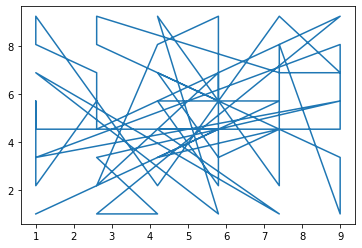

In [17]:
plt.plot(df_t.X_tx,df_t.Y_tx)

In [18]:
#for i in range(int ((s/2)-2)):
  #x,y = df_t.X_tx[i],df_t.Y_tx[i]
  #print(x, y, end = '\n')

In [19]:
import math
from sympy import Point, Circle

In [20]:
from itertools import combinations
comb = combinations(df_t.X_tx,3)
len(list(comb))

17296

In [ ]:
#list(cv)
#cv = df_t.sample(n)
#len(cv)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


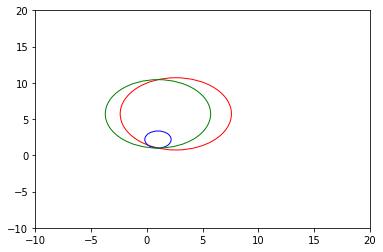

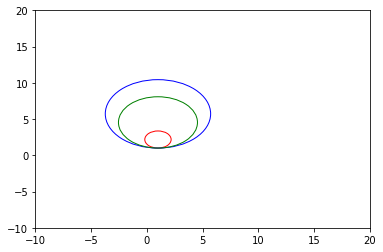

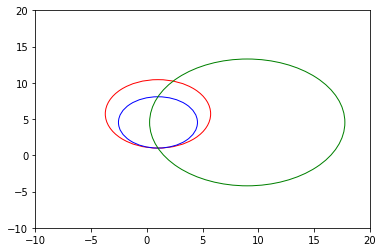

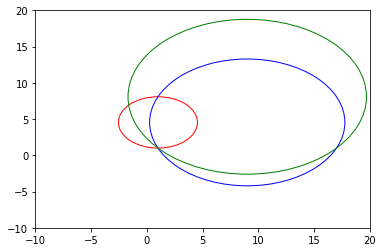

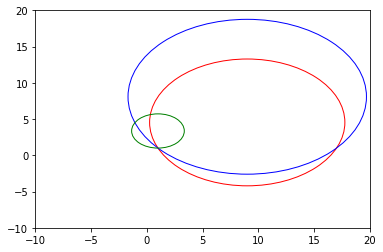

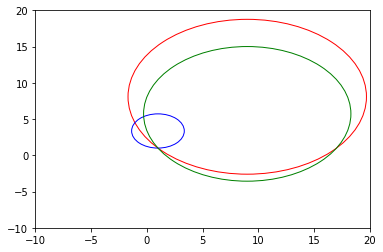

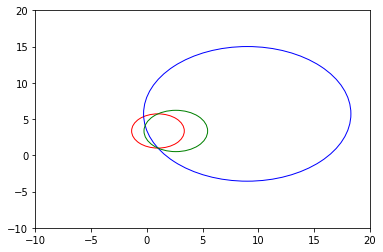

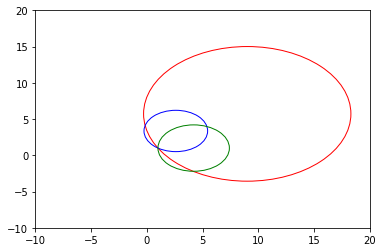

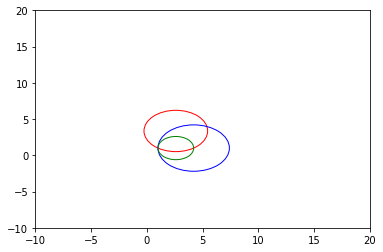

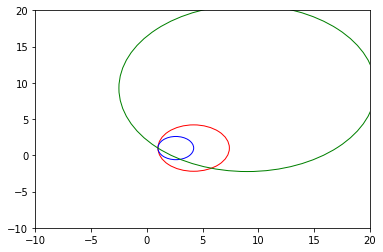

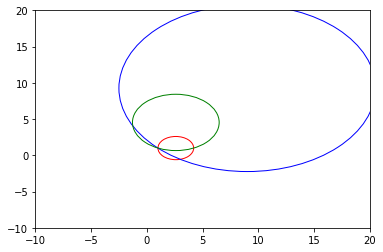

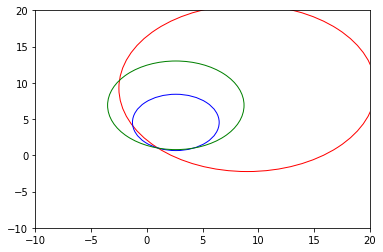

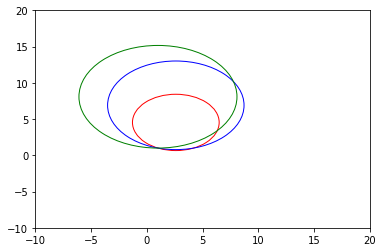

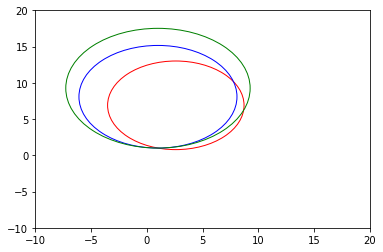

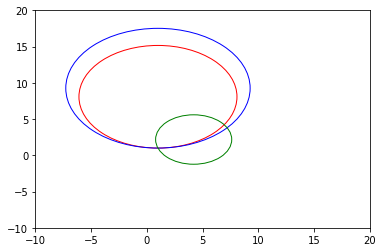

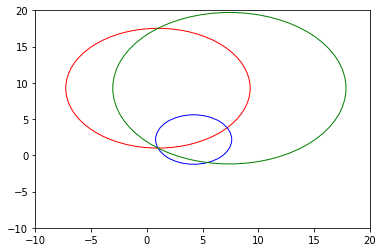

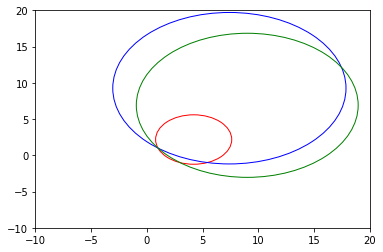

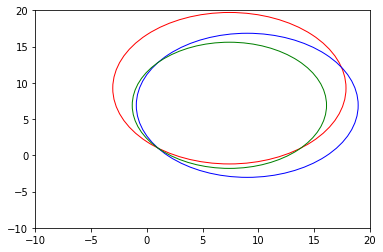

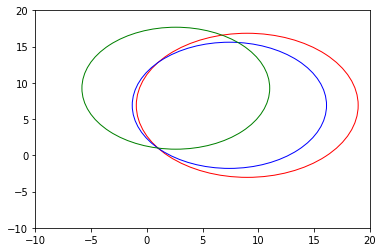

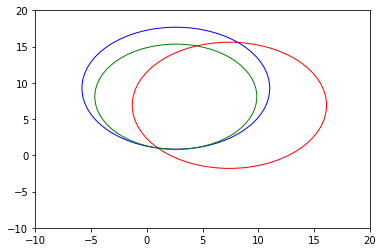

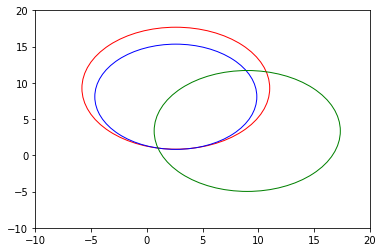

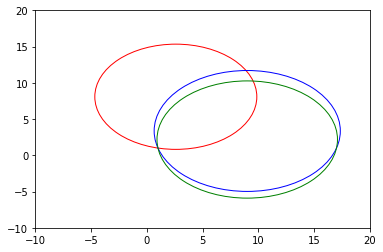

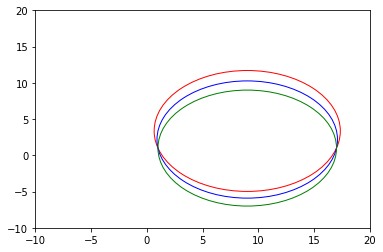

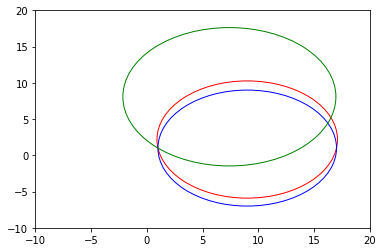

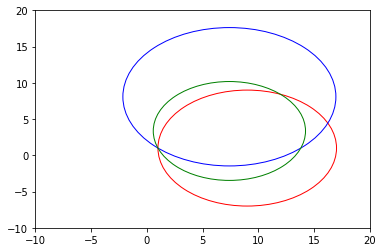

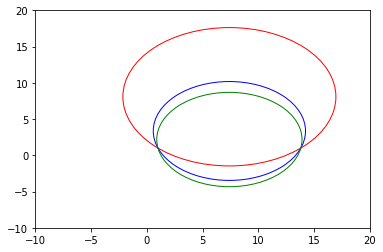

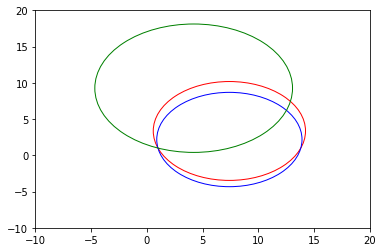

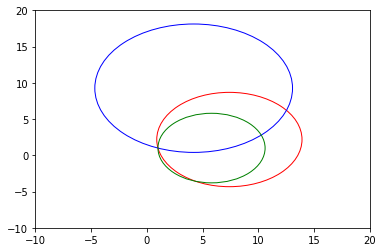

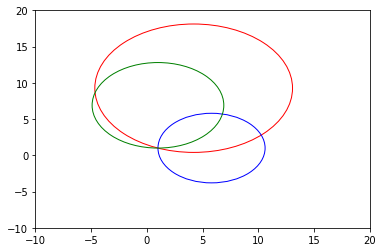

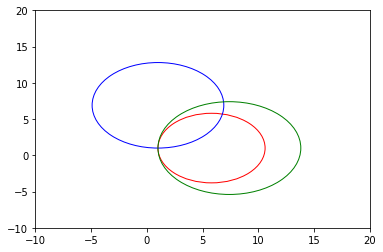

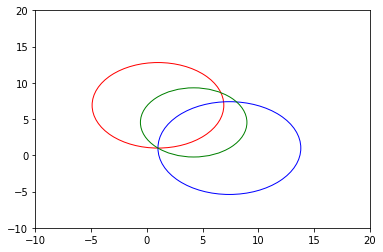

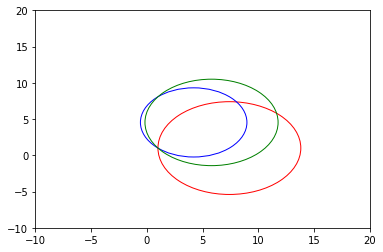

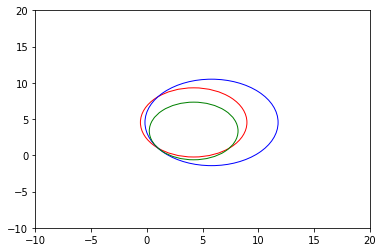

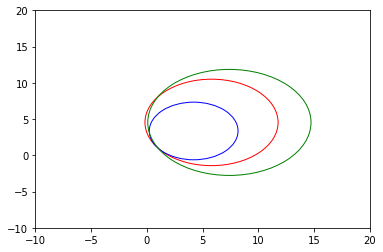

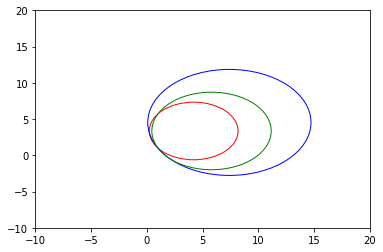

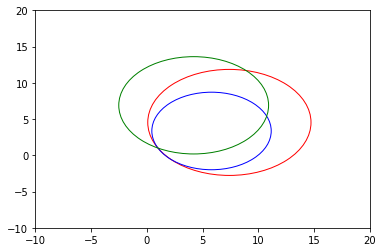

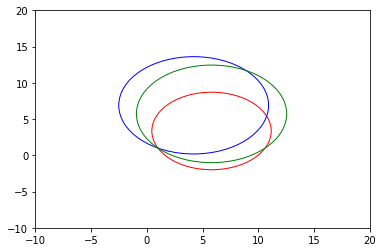

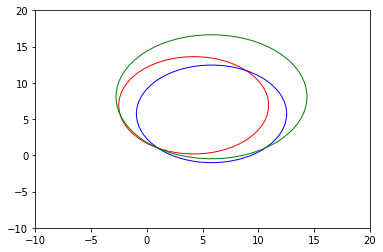

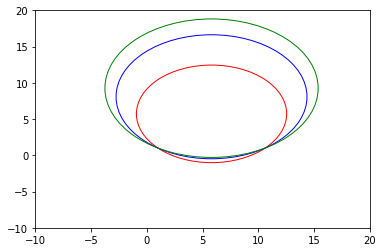

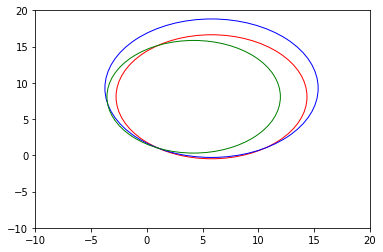

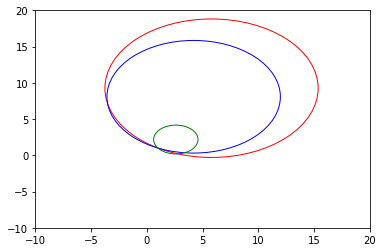

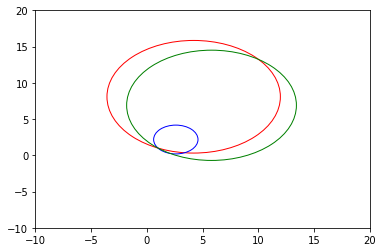

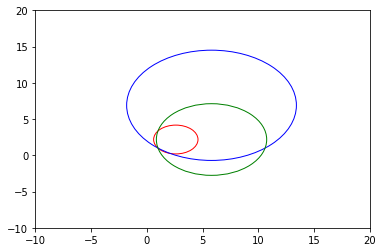

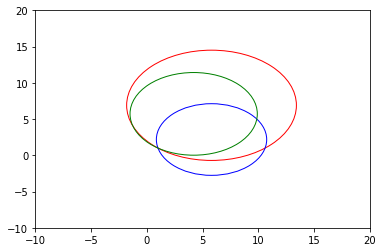

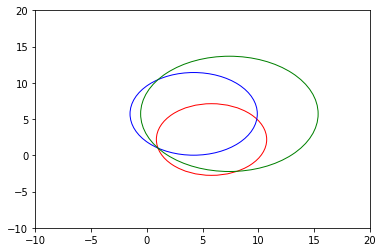

In [22]:
for i in range(int (s/2-3)):
  x,y = df_t.X_tx[i],df_t.Y_tx[i]
  p1 = Point(df_t.X_tx[i],df_t.Y_tx[i])
  p2 = Point(df_t.X_tx[i+1],df_t.Y_tx[i+1])
  p3 = Point(df_t.X_tx[i+2],df_t.Y_tx[i+2])
  p4 = Point(1.0,1.0)
  #d1 = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
  #d2 = math.sqrt( ((p2[0]-p3[0])**2)+((p2[1]-p3[1])**2) )
  #d3 = math.sqrt( ((p3[0]-p1[0])**2)+((p3[1]-p1[1])**2) )
  r1 = math.sqrt( ((p1[0]-p4[0])**2)+((p1[1]-p4[1])**2) )
  r2 = math.sqrt( ((p2[0]-p4[0])**2)+((p2[1]-p4[1])**2) )
  r3 = math.sqrt( ((p3[0]-p4[0])**2)+((p3[1]-p4[1])**2) )
  #print(d1)
  #print(d2)
  #print(d3)
  #print(r1)
  #print(r2)
  #print(r3)
  figure, axes = plt.subplots() 
  axes.set_xlim([-10,20])  
  axes.set_ylim([-10,20])
  c1 = plt.Circle((p1),r1,color='red', fill= False) 
  c2 = plt.Circle((p2),r2,color='blue', fill= False)
  c3 = plt.Circle((p3),r3,color='green', fill= False)
  axes.add_artist(c1)
  axes.add_artist(c2)
  axes.add_artist(c3) 
  #plt.show()

In [24]:
def get_intersections(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h1=(math.sqrt(math.fabs(r0**2-a**2)))
        h = math.fabs(h1)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return (x3, y3, x4, y4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


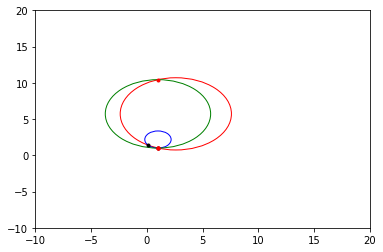

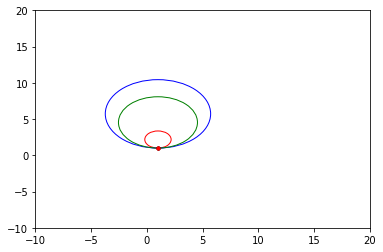

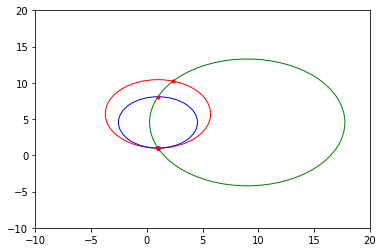

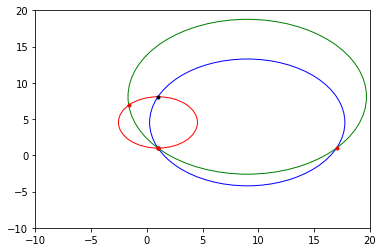

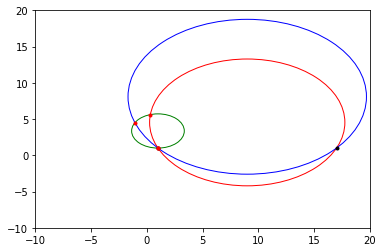

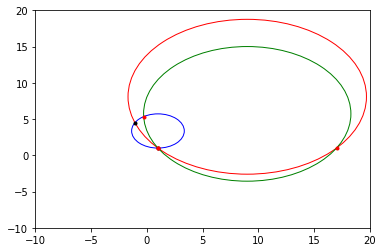

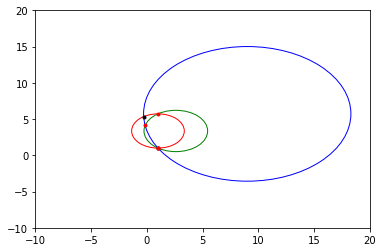

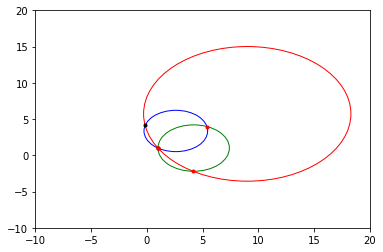

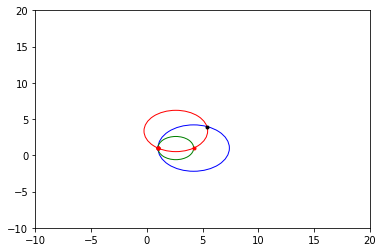

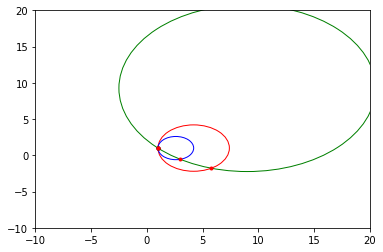

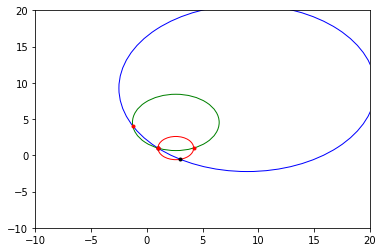

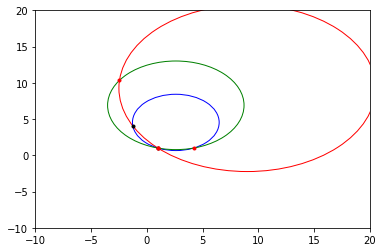

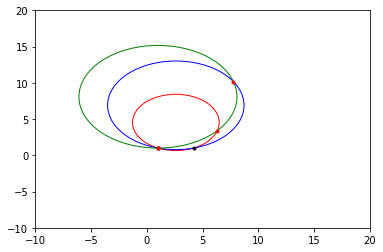

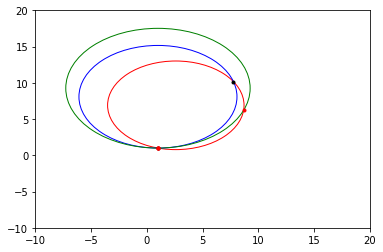

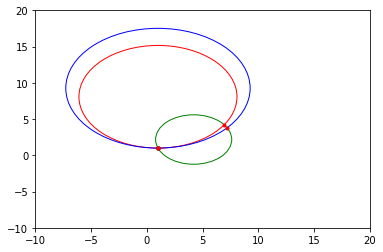

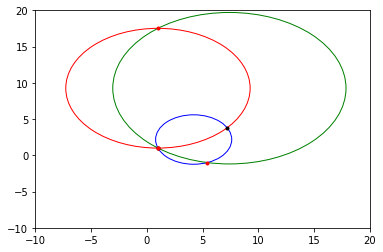

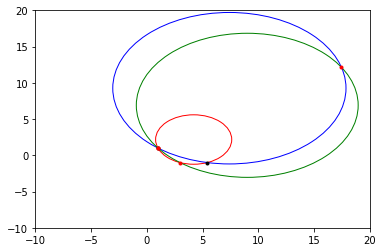

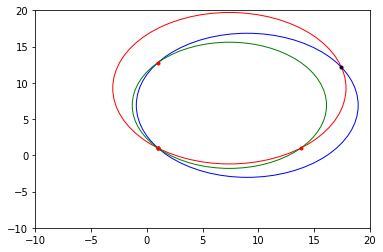

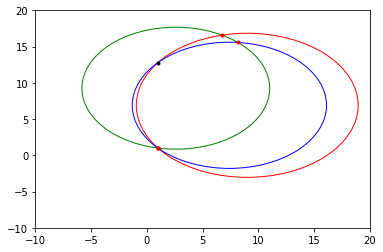

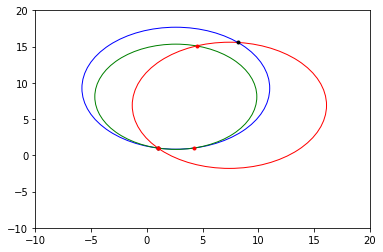

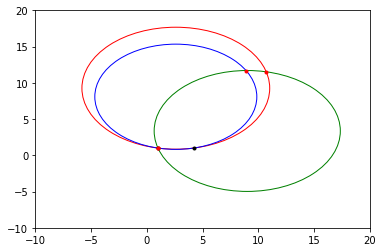

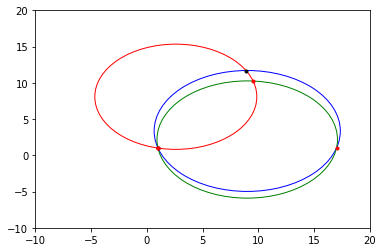

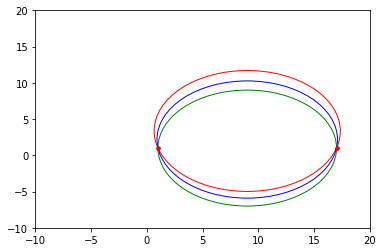

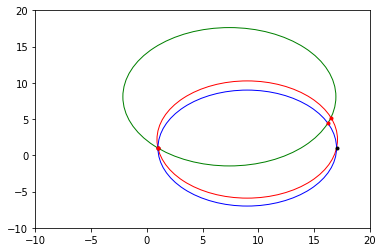

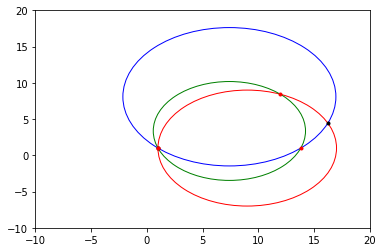

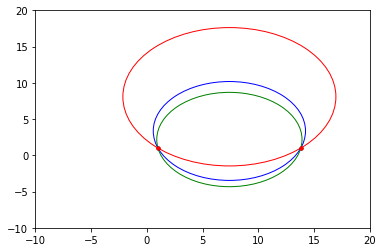

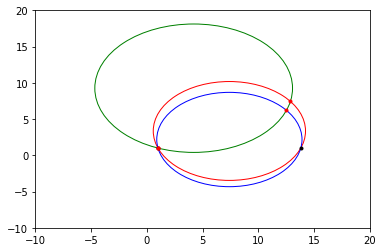

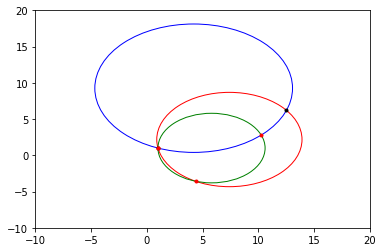

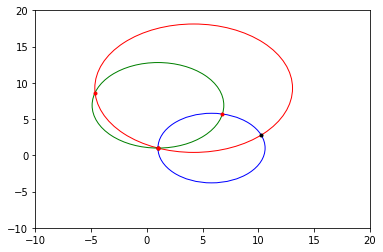

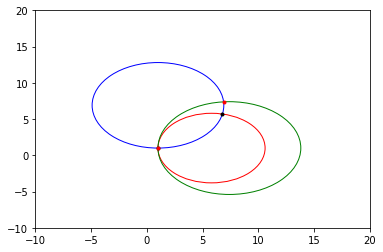

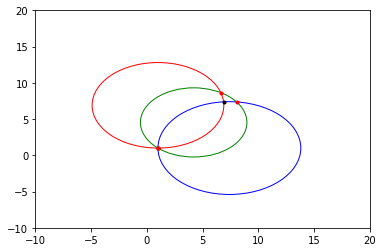

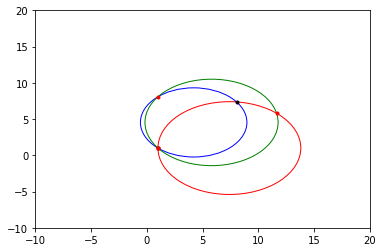

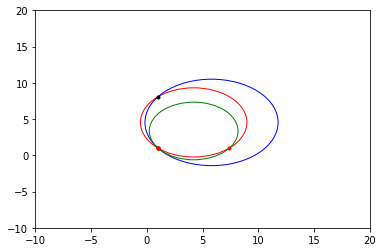

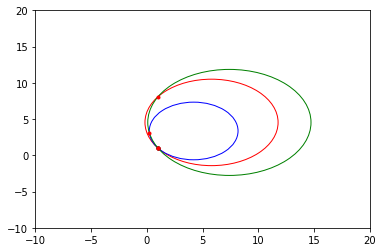

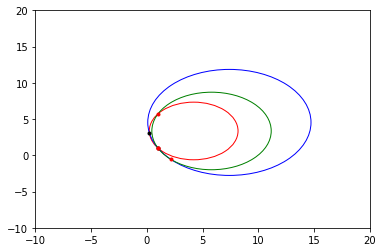

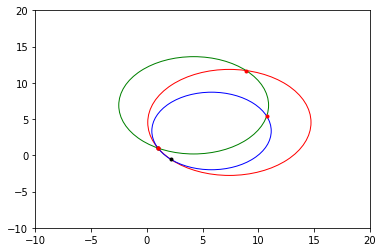

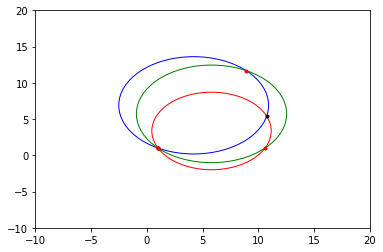

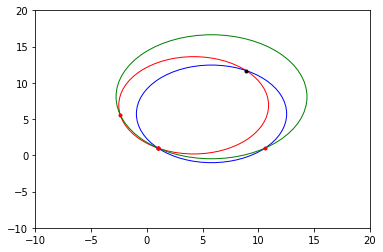

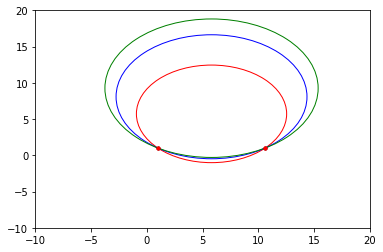

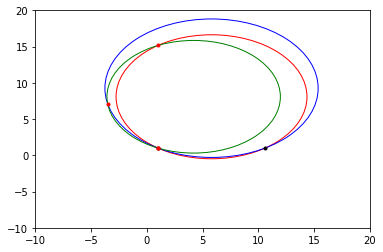

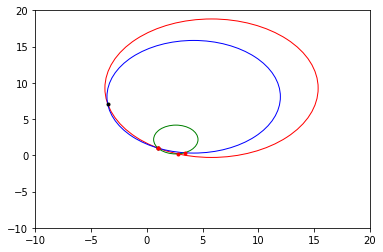

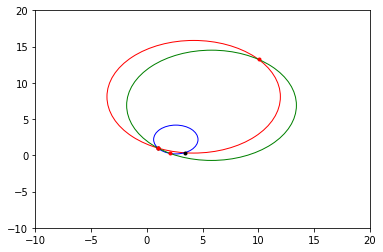

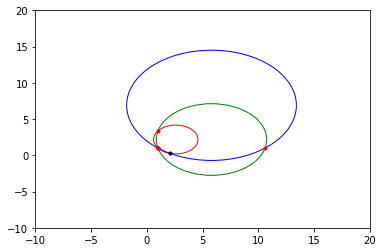

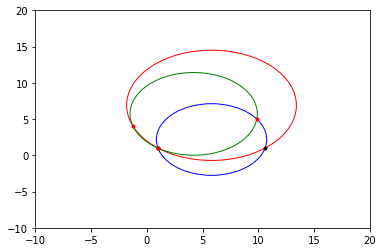

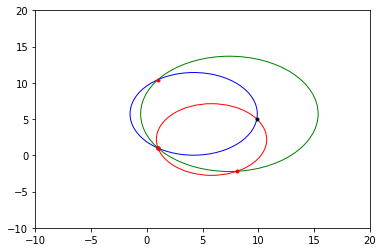

In [27]:
# intersection circles
for i in range(int(s/2-3)):
    x0, y0 = Point(df_t.X_tx[i],df_t.Y_tx[i]) 
    r0 = math.sqrt( ((x0-p4[0])**2)+((y0-p4[1])**2) )

    x1, y1 =  Point(df_t.X_tx[i+1],df_t.Y_tx[i+1])
    r1 =  math.sqrt( ((x1-p4[0])**2)+((y1-p4[1])**2) )

    # intersecting with (x1, y1) but not with (x0, y0)
    x2, y2 = Point(df_t.X_tx[i+2],df_t.Y_tx[i+2])
    r2 = math.sqrt( ((x2-p4[0])**2)+((y2-p4[1])**2) )

    circle1 = plt.Circle((x0, y0), r0, color='r', fill=False)
    circle2 = plt.Circle((x1, y1), r1, color='b', fill=False)
    circle3 = plt.Circle((x2, y2), r2, color='g', fill=False)

    fig, ax = plt.subplots() 
    ax.set_xlim((-10, 20))
    ax.set_ylim((-10, 20))
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
    
    intersections = get_intersections(x0, y0, r0, x1, y1, r1)
    if intersections is not None:
        i_x3, i_y3, i_x4, i_y4 = intersections 
        plt.plot([i_x3,i_x4], [i_y3,i_y4] ,'.', color='black')
        #print(i_x3,i_y3)
        #print(i_x4,i_y4)
        
    intersections = get_intersections(x0, y0, r0, x2, y2, r2)
    if intersections is not None:
        i_x3, i_y3, i_x4, i_y4 = intersections 
        plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')
        #print(i_x3,i_y3)
        #print(i_x4,i_y4)

    intersections = get_intersections(x1, y1, r1, x2, y2, r2)
    if intersections is not None:
        i_x3, i_y3, i_x4, i_y4 = intersections 
        plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')
        #print(i_x3,i_y3)
        #print(i_x4,i_y4)

    plt.gca().set_aspect("auto", adjustable='box')
    #print(i_x3,i_y3, end = '\n')
    #print(i_x4,i_y4, end = '\n')

In [ ]:
#print(i_x3,i_y3)
#print(i_x4,i_y4)

In [ ]:
#intersections = get_intersections(2.6, 5.72,r1, 1.0 , 2.18 ,r2)
#if intersections is not None:
 #   i_x3, i_y3, i_x4, i_y4 = intersections 
  #  plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

#intersections = get_intersections(1.0,4.54, r3,1.0,2.18, r2)
#if intersections is not None:
 #   i_x3, i_y3, i_x4, i_y4 = intersections 
  #  plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

#intersections = get_intersections(2.6,5.72, r1, 1.0, 4.54, r3)
#if intersections is not None:
 #   i_x3, i_y3, i_x4, i_y4 = intersections 
  #  plt.plot([i_x3, i_x4], [i_y3, i_y4], '.', color='r')

#plt.gca().set_aspect('auto', adjustable='box')
#plt.show()

In [ ]:
#from sympy import Point, Circle, Line, Ray

#p1, p2, p3 = Point(2.6, 5.72), Point( 1.0 , 2.18), Point(1.0, 4.54)

#p4 = Point(i_x4,i_y4)

#c1 = Circle(p1,r1)
#c1.intersection(p4)

#c2 = Circle(p2,r2)
#c2.intersection(p4)

#c3.intersection(p4)

In [ ]:
#import matplotlib.pyplot as plt 
  
#figure, axes = plt.subplots() 
#c1 = plt.Circle((p1[0],p1[1]),r1,color='red', fill= False) 
#c2 = plt.Circle((p2[0],p2[1]),r2,color='blue', fill= False)
#c3 = plt.Circle((p3[0],p3[1]),r3,color='green', fill= False)

#axes.set_xlim([0,100])  
#axes.set_ylim([0,100])
#axes.set_aspect(1) 
#plt.autoscale(enable=True, axis='x', tight=False)
#axes.add_artist(c1)
#axes.add_artist(c2)
#axes.add_artist(c3) 

#x = [2.6,1.0,1.0,2.6]
#y = [5.72,2.18,4.54,5.72]
#plt.plot(x, y)
#plt.show()